# Writing a Simple Neural Network with Numpy

(see [Learning Pytorch with examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html))

## Generate Some Data

Say we had some periodic data which we can generate like so:

In [120]:
import numpy as np
import math
import pandas as pd
import sympy


Make some 

In [121]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

To plot this first make a data frame

In [122]:
data = {'Input': x,
        'Output': y
}



df = pd.DataFrame(data, columns = ['Input', 'Output'])

print(df)

         Input        Output
0    -3.141593 -1.224647e-16
1    -3.138449 -3.143159e-03
2    -3.135306 -6.286287e-03
3    -3.132163 -9.429353e-03
4    -3.129020 -1.257233e-02
...        ...           ...
1995  3.129020  1.257233e-02
1996  3.132163  9.429353e-03
1997  3.135306  6.286287e-03
1998  3.138449  3.143159e-03
1999  3.141593  1.224647e-16

[2000 rows x 2 columns]


Now use some Boilerplate to make the plot:

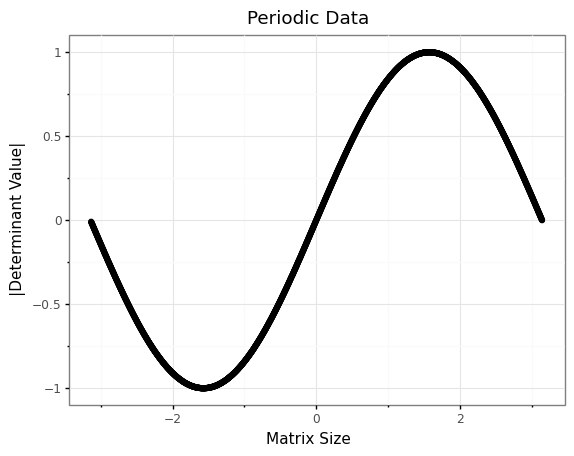

<ggplot: (8759071219351)>

In [123]:
from plotnine import *
import copy

df_plot = copy.copy(df[3:])
df_plot['Output'] = df_plot['Output'].astype(float).round(3)
df_plot

(
    ggplot(df_plot, aes(x = 'Input', y = 'Output')) +
        geom_point() +
        theme_bw() +
        labs(x = "Matrix Size", y = "|Determinant Value|") +
        ggtitle('Periodic Data')

)

## Train a Regression Model using Numpy

Let's try and fit a cubic function to this curve, we'll see how close our model can get:

$$
y = a + b \times x + c\times x^2 + d\times x^3
$$

To do this we'll have to pick some some values for $a$, $b$, $c$ and $d$ to start with:

In [124]:
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

Now if we measure how well the model fits by the square error we can work out all these partial derivatives:
\begin{align}
    \mathrm{RSS}                                      & = \sum^{n}_{i= 1}   \left[ \left( \hat{y}_i - y_i \right)^2 \right]  \\
    \frac{\partial \mathrm{RSS} }{\partial \hat{y}_i} & = 2 \sum^{n}_{i= 1}   \left[ \hat{y}_i - y_i \right]  \\
 \frac{\partial \mathrm{RSS} }{\partial a}            & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial \hat{y} }{\partial a} \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial  }{\partial a} \left( a+bx + cx^2 + dx^3 \right) \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \left( 1 \right) \\
						      & = 2 \sum^{n}_{i= 1}   \left[\left(  \hat{y}_i - y_i  \right) \right]  \\
    \frac{\partial \mathrm{RSS} }{\partial b}         & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial \hat{y} }{\partial c} \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial  }{\partial b} \left( a+bx + cx^2 + dx^3 \right) \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \left( x \right) \\
						      & = 2 \sum^{n}_{i= 1}   \left[\left(  \hat{y}_i - y_i  \right) x \right]  \\
    \frac{\partial \mathrm{RSS} }{\partial c}         & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial \hat{y} }{\partial c} \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial  }{\partial c} \left( a+bx + cx^2 + dx^3 \right) \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \left( x^2 \right) \\
						      & = 2 \sum^{n}_{i= 1}   \left[\left(  \hat{y}_i - y_i  \right) x^2 \right]  \\
    \frac{\partial \mathrm{RSS} }{\partial d}         & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial \hat{y} }{\partial d} \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \times \frac{\partial  }{\partial c} \left( a+bx + cx^2 + dx^3 \right) \\
                                                      & = \frac{\partial \mathrm{RSS} }{\partial \hat{y}} \left( x^3 \right) \\
						      & = 2 \sum^{n}_{i= 1}   \left[\left(  \hat{y}_i - y_i  \right) x^3 \right]  \\
\end{align}


The gradient descent technique adjusts the weights by using these gradients in order to try and find a mimimum value like so:


\begin{align}
    w_i \leftarrow w_i - \eta \frac{\partial w_i }{\partial \mathrm{RSS}} \quad \exists \eta \in \mathbb{R}
\end{align}


This can be implemented using a loop:

1. Calculate $\hat{y}$
2. Calculate $\mathrm{RSS}$
3. Calculate $\frac{\partial \mathrm{RSS}}{\partial w}$
4. Adjust $w$ using the weights


In [125]:
learning_rate = 1e-6
eta = learning_rate     # because It's shorter

epoch = len(x)
for t in range(10*epoch):
    # 1. Find yhat (forward pass in NN)
    y_pred = a + b*x +c*x**2 + d*x**3

    # 2. Measure the Loss
    loss = np.square(y_pred-y).sum()
    ## Print it on ocassion
    if t % 900 == 0:
        print(t, '\t', loss)

    # 3. Calculate the Gradients (Back Propagation)
    grad_y_pred = 2.0 * (y_pred-y)
    grad_a = (grad_y_pred*x**0).sum()
    grad_b = (grad_y_pred*x**1).sum()
    grad_c = (grad_y_pred*x**2).sum()
    grad_d = (grad_y_pred*x**3).sum()

    # 4. Update the Weights
    a = a - eta*grad_a
    b = b - eta*grad_b
    c = c - eta*grad_c
    d = d - eta*grad_d

    
print("\nFinished\n---\n")
print(f'Output: y = {a.round(1)} + {b.round(1)}x + {c.round(1)}x^2 + {d.round(1)}x^3')



0 	 72971.57146560875
900 	 77.93033869663806
1800 	 10.519442288522367
2700 	 8.85972379911075
3600 	 8.818256957030204
4500 	 8.817194591644643
5400 	 8.817166239870545
6300 	 8.817165435606961
7200 	 8.817165410872406
8100 	 8.817165410038916
9000 	 8.817165410008286
9900 	 8.817165410007078
10800 	 8.817165410007027
11700 	 8.817165410007025
12600 	 8.817165410007025
13500 	 8.817165410007025
14400 	 8.817165410007025
15300 	 8.817165410007025
16200 	 8.817165410007025
17100 	 8.817165410007025
18000 	 8.817165410007025
18900 	 8.817165410007025
19800 	 8.817165410007025

Finished
---

Output: y = -0.0 + 0.9x + 0.0x^2 + -0.1x^3


As can be seen, the best the model can do is to fit with an RSS of 8.817, let's plot the model:

In [126]:
# create the Column
df['Prediction'] = a + b*x + c*x**2 + d*x**3

In [127]:
print(df.head(3))

      Input        Output  Prediction
0 -3.141593 -1.224647e-16    0.202297
1 -3.138449 -3.143159e-03    0.196313
2 -3.135306 -6.286287e-03    0.190346


In [128]:
# Pivot the Data Frame to be longer
df_melt = pd.melt(df, id_vars = ['Input'], value_vars = ['Output', 'Prediction'], var_name = "Output_Type", value_name = "Output_Value")
print(df_melt.head(3))


      Input Output_Type  Output_Value
0 -3.141593      Output -1.224647e-16
1 -3.138449      Output -3.143159e-03
2 -3.135306      Output -6.286287e-03


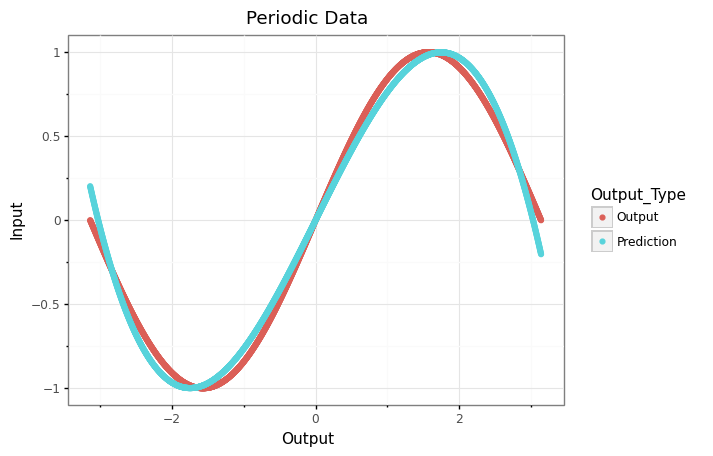

<ggplot: (8759071350586)>

In [129]:
# Make the Plot
(
    ggplot(df_melt, aes(x = 'Input', y = 'Output_Value', color = 'Output_Type')) +
        geom_point() +
        theme_bw() +
        labs(x = "Output", y = "Input") +
        ggtitle('Periodic Data')

)

As can be seen this got pretty close, the cubic curve is fundamentally different from a sine wave however.

## Train Regression using Torch Tensors

PyTorch has `tensors` which are just like `numpy` arrays and so the same thing could be done using Torch like so:

In [130]:
import torch
import math

# Set the Defaults
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # This would turn on Cuda Cores

# Build the data
x = torch.linspace(-math.pi, math.pi, 2000, device = device, dtype = dtype, requires_grad=False)
y = torch.sin(x)

# Create the Random Weights
a = torch.randn((), device = device, dtype = dtype)
b = torch.randn((), device = device, dtype = dtype)
c = torch.randn((), device = device, dtype = dtype)
d = torch.randn((), device = device, dtype = dtype)

eta = 1e-6
print('t', '\t', 'Loss')
print('----------------')
# Begin the Loop
for t in range(3000):

    # 1. Predict the Model Output (Forward Pass)
    y_pred = a + b*x + c*x**2 + d*x**3 

    # 2. Measure the Loss of the Model
    loss = (y_pred-y).pow(2).sum().item()
    ## Print the loss
    if t % 200 == 0 :
        print(t, '\t', round(loss, 2))

    # 3. Calculate the Gradients with respect to Loss (Back Propagation)
    grad_y_pred = 2*(y_pred-y)
    grad_a_pred = (grad_y_pred * 1).sum()
    grad_b_pred = (grad_y_pred * x).sum()
    grad_c_pred = (grad_y_pred * x**2).sum()
    grad_d_pred = (grad_y_pred * x**3).sum()

    # 4. Update the weights
    a = a - eta * grad_a_pred
    b = b - eta * grad_b_pred
    c = c - eta * grad_c_pred
    d = d - eta * grad_d_pred

print('---\n\nFinished!\n\n---')
print(f'y = {round(a.item(),2 )} + {round(b.item(), 2)}*x + {round(c.item(), 2)}*x^2 + {round(d.item(), 2)}*x^3')


t 	 Loss
----------------
0 	 104131.62
200 	 412.51
400 	 210.69
600 	 109.78
800 	 59.32
1000 	 34.08
1200 	 21.46
1400 	 15.14
1600 	 11.98
1800 	 10.4
2000 	 9.61
2200 	 9.21
2400 	 9.02
2600 	 8.92
2800 	 8.87
---

Finished!

---
y = 0.01 + 0.86*x + -0.0*x^2 + -0.09*x^3


## Using Autograd to implement Automatic Differentiation

The real point of using Torch however is that the gradients can be automatically calculated via *Automatic Differentiation*, this makes it much easier to work with gradients for complex deeply nested functions (i.e. Neural Networks).

So first import the packages, set the devices and  create some data:

In [131]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

In [132]:
# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)


Now we can create some random weights, this time ensuring that the gradients are calculated:

In [133]:

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

Next we just use a loop to continuously adjust the weights:

1. **Forward Pass**; Calculate the y prediction
2. Measure the Loss
3. **Back Propagation**; Calculate the gradients $\frac{\partial w_i}{\partial \mathrm{E}}$
  * This differs here, rather than working out the derivatives ourselves, we can just call loss.backward() and all the derivative values will be stored in the `.grad` attributes.
  * After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    the gradient of the loss with respect to a, b, c, d respectively.
    
4. Update the weights
  * Just like before, but this time we can just use the `.grad` attribute
  * This needs to be wrapped in a `with torch.nograd()` so that the weights of `a` aren't recalculated with respect to the adjustment, we would instead re-calculate the gradients on the next iteration of the loop at loss.backward
  * The gradients should be reset to zero so that the attribute is free on the next iteration (and to avoid old gradients being used in the event of an error)
 

In [134]:

print('iterations', '\t', 'loss')
print('----------------\n')
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, '\t', loss.item())
       

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


iterations 	 loss
----------------

99 	 953.04736328125
199 	 670.9481201171875
299 	 473.37261962890625
399 	 334.9139099121094
499 	 237.83016967773438
599 	 169.7213592529297
699 	 121.91608428955078
799 	 88.34587097167969
899 	 64.76114654541016
999 	 48.184852600097656
1099 	 36.52949523925781
1199 	 28.331130981445312
1299 	 22.56231117248535
1399 	 18.501667022705078
1499 	 15.6424560546875
1599 	 13.628609657287598
1699 	 12.209774017333984
1799 	 11.209871292114258
1899 	 10.505023002624512
1999 	 10.008047103881836
Result: y = 0.03574589267373085 + 0.8498380184173584 x + -0.006166761741042137 x^2 + -0.09234852343797684 x^3


## Defining Functions in Torch

Torch uses the chain rule and Automatic Differentiation, this isnt an issue if the function, say $y = a + bx + cx^2 + dx^3$, can be conveniently constructed using `torch` *methods*, if not it may be more convenient to create a function and outright specify what the forward/backward pass should give:

  * *forward* pass
    * (i.e. the output of the function)
  * *backward* pass
    * (i.e. the gradient of the output, with respect to the input):
    
    \begin{alignat}{2}
    f(x) &= \mathtt{forward}\left(x\right) &= 4x^3 \\
    \implies \frac{\partial f}{\partial x} &= \mathtt{backward}\left(x\right) &= 12x^2
    \end{alignat}


So let's say, for example that my modelling problem was a little tricker, I wanted to model a $\mathrm{sinh}$ curve using a sigmoid function, for whatever reason :shrug:, It may be better to write a sigmoid function so that the code is more modular.

To do this we simply need to define a subclass of `torch.autograd.Function`.

In [136]:
x = torch.randn()

TypeError: tanh(): argument 'input' (position 1) must be Tensor, not int